# Table of Contents

1. [Introduction](#1.)<br>
2. [Import data and libraries](#2.)<br>
    2.1.[Python libraries](#2.1.)<br>
    2.2.[Load dataset](#2.2.)<br>
    2.3.[Data Dictionary](#2.3.)<br>
    2.4.[Describe dataset](#2.4.)<br>
3. [Exploratory analysis & Feature engineering](#3.)<br>
    3.1. [Sex](#3.1.)<br>
    3.2. [Age and Age_bracket (new feature)](#3.2.)<br>
    3.3. [PClass](#3.3.)<br>
    3.4. [Embarked](#3.4.)<br>
    3.5. [Cabin and Deck (new feature)](#3.5.)<br>
    3.6. [Parch, SibSp, and FamilySize (new feature)](#3.6.)<br>
    3.7. [Fare and Fare_bracket (new feature)](#3.7.)<br>
    3.8. [Title](#3.8.)<br>
4. [Machine Learning Model](#4.)<br>
    4.1. [Create feature and response list](#4.1.)<br>
    4.2. [Logistic Regression](#4.2.)<br>
    4.3. [K-Nearest Neighbors](#4.3.)<br>
    4.4. [Decision Tress](#4.4.)<br>
    4.5. [SVC](#4.5.)<br>
    4.6. [Random Forest](#4.6.)<br>
5. [Evaluation](#5.)<br>


----
# 1. Introduction <a id="1."></a>

In this notebook I will be exploring the Titanic dataset on Kaggle to create a model that can predict which passengers survived the tragedy.

**Competetion Description**

Kaggle: https://www.kaggle.com/c/titanic
>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. 

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


----
# 2. Import Data and Libraries<a id="2."></a>
## 2.1. Python Libraries<a id="2.1."></a>

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualizatoin
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# Machine Learnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



## 2.2. Load Dataset<a id="2.2."></a>

In [2]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

datasets = [train_df, test_df] # useful for performing operations on both dataframes

## 2.3. Data Dictionary<a id="2.3."></a>

**`Variable:`  Definition**
- `survival:` Survival	
- `pclass:` Ticket class. A proxy for socio-economic status (SES)

        1st = Upper
        2nd = Middle
        3rd = Lower	
- `sex:` Male/Female	
- `Age:` Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5	
- `sibsp:` # of siblings / spouses aboard the Titanic The dataset defines family relations in this way...
        
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were	
- `parch:` # of parents / children aboard the Titanic. The dataset defines family relations in this way...

        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.	
- `ticket:` Ticket number	
- `fare:` Passenger fare	
- `cabin:` Cabin number	
- `embarked:` Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**Key**
- 0 = No, 1 = Yes
- 1 = 1st, 2 = 2nd, 3 = 3rd

## 2.4. Describe the data set<a id="2.4."></a>

- Catagorical features: `Survived`, `Pclass`, `Sex`, `Cabin`, `Embarked`
- Nuberical features: `Age`, `Fare`, `SibSp`, `Parch`
- 891 total passengers. 64.7% were male (577 freq), 35.2% were female (314 freq)
- Around 38.4% of the passengers survived. Real survivor rate was ~32%
- There is a lot of duplication in the `ticket` feature (23.5% duplicates, 681 unique entries)
- There are 3 possible port in the `Embarked` feature
- `Age`, `Cabin`, and `Embarked` have missing values. They will be addressed below


In [3]:
print ('-'*15 + 'Train' + '-'*15)
print(train_df.info())
print ('-'*15 + 'Test' + '-'*15)
print(test_df.info())

---------------Train---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
---------------Test---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-nul

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baxter, Mr. Quigg Edmond",male,347082,G6,S
freq,1,577,7,4,644


-----
# 3. Exploratory analysis & Feature engineering<a id="3."></a>

Let's view the influence of the each feature on the Survival rate. As we go through the features, we will be applying feature engineering and data manupilation techniques to both `train_df` and `test_df` by iterating through the `datasets` list.

**Overall Survival Rate**

Lets start by reviewing the overall Surival rate of the passengers. This will be a useful baseline to measure the influence of each feature on the survival chance. 

In [6]:
pct_survived = train_df.Survived.mean()
print (pct_survived)

0.3838383838383838


Let's define a helper function that will plot each feature against the Surival Rate:

In [7]:
def plot_helper (dataframe, title, baseline):
    '''
    Helper funcion for plotting
    '''
    ax = dataframe.plot(kind = "barh", figsize =(7,5), xlim=(0.0,1.0))
    ax.set_title (title)
    ax.axvline(x=baseline, color ='g',linestyle='--', label='Overall Surivival %')
    ax.legend()
    for p in ax.patches:
        ax.annotate (str(round(p.get_width(),3)),
                     xy=(p.get_x()+0.02, p.get_y()+p.get_height()/2.5),
                     color = "white" )
    plt.show()

## 3.1. `Sex`<a id="3.1."></a>

Let's map the Sex feature as follows: Male = 1 and Female = 0. And lets review the survival rate based on gender in the `train` dataset.

In [8]:
# Change Sex to 1=male, 0=female
for df in datasets:
    df['Sex'] = df['Sex'].map({'male': 1, 'female':0})

train_df.Sex.value_counts()
#test_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

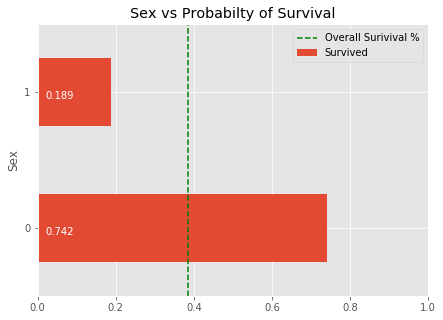

In [9]:
plot_helper(train_df[['Sex','Survived']].groupby(['Sex']).mean(),
            "Sex vs Probabilty of Survival",pct_survived)

## 3.2. `Age` and *`Age_bracket (new feature)`*<a id="3.2."></a>

Fill the missing ages with the mean age of the each gender in the `train` and `test` datasets

In [10]:
for df in datasets:
    # Calculate the mean ages for male and female passengers
    mean_female_age = df.groupby(['Sex']).mean().loc[0,'Age']
    mean_male_age = df.groupby(['Sex']).mean().loc[1,'Age']
   
    df.loc[(df.Sex == 0) & (df.Age.isnull()),'Age'] = mean_female_age # Female & Null age
    df.loc[(df.Sex == 1) & (df.Age.isnull()),'Age'] = mean_male_age # Male & Null age
    
# Summarize age in the test and train datasets:
pd.DataFrame({'Train':train_df.Age.describe(),'Test':test_df.Age.describe()})

,Test,Train
count,418.000000,891.000000
mean,30.272597,29.736034
std,12.634534,13.014897
min,0.170000,0.420000
25%,23.000000,22.000000
50%,30.272362,30.000000
75%,35.750000,35.000000
max,76.000000,80.000000


Looks like the vast majority of the passengers were under 36 years of age. To better analyze the influent of age on survivability, let us split it into brackets based on decades.

In [11]:
for df in datasets:
    df['Age_bracket'] = pd.cut(df['Age'], [0,10,20,30,40,50,60,100],
                              labels = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60+)'])

train_df.Age_bracket.value_counts()

[20-30)    283
[30-40)    279
[10-20)    115
[40-50)     86
[0-10)      64
[50-60)     42
[60+)       22
Name: Age_bracket, dtype: int64

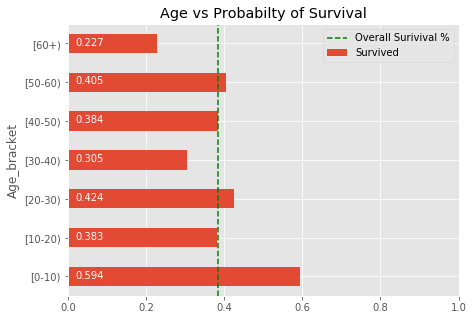

In [12]:
plot_helper(train_df[['Age_bracket','Survived']].groupby(['Age_bracket']).mean(),
            "Age vs Probabilty of Survival", pct_survived)

## 3.3. `PClass`<a id="3.3."></a>

There are 3 classes of tickets with the vast majority of the passengers travelling in 3rd class. 

In [13]:
train_df[['Pclass','PassengerId']].groupby(['Pclass']).count()

,PassengerId
Pclass,
1,216
2,184
3,491


We can hypothesize that the survival rate would decrease as we went from 1st class to 3rd class. Lets plot the surivival rate for each class:

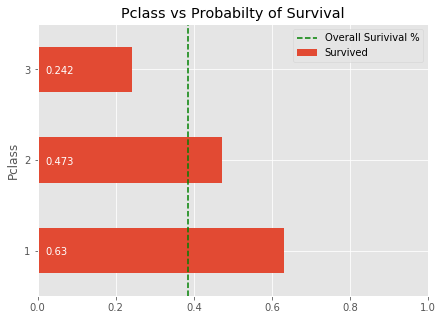

In [14]:
plot_helper(train_df[['Pclass','Survived']].groupby(['Pclass']).mean(),
            "Pclass vs Probabilty of Survival", pct_survived)

## 3.4. `Embarked`<a id="3.4."></a>
- There are three ports of Embarkation: 
  - C = Cherbourg, Q = Queenstown, S = Southampton.
- For the missing entries, we will estimate the port of Embarkation based on the most frequent Port.

(Optional) Review the breakdown of passengers by Port of Embarkation. Most frequent is Southhampton 'S'

In [15]:
pd.DataFrame({'Train':train_df['Embarked'].value_counts(),
             'Test':test_df['Embarked'].value_counts()})

,Test,Train
S,270,644
C,102,168
Q,46,77


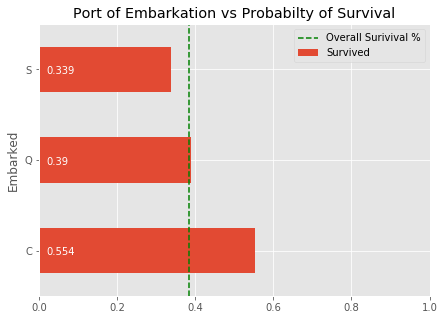

In [16]:
for df in datasets:
    df.loc[df.Embarked.isnull(),'Embarked'] = df.Embarked.value_counts().index[0]    

plot_helper(train_df[['Embarked','Survived']].groupby(['Embarked']).mean(),
        "Port of Embarkation vs Probabilty of Survival", pct_survived)

## 3.5.  `Cabin` and *`Deck` (new feature)*<a id="3.5."></a>

- Lot of values are missing the Cabin info - only ~23% of the samples have cabin info. 
- Let us extract the first letter of the `Cabin` to a separate `Deck` column. 
- For missing samples with missing `Cabin` info, I will categorize the `Deck` as 'U' for Unknown.
- A few samples have multiple Cabins per line (eg. B82 B84). For same of simplicity, I will use the first cabin to determine the Deck (B82 `->` Deck B)

In [17]:
for df in datasets:
    # Label all NaN Cabin values = Unknown
    df.loc[df.Cabin.isnull(), 'Cabin'] = 'Unknown'
    
    # Take the first letter of the Cabin, and use it as the 'Deck'
    df['Deck'] = df.Cabin.map(lambda x: str(x).split()[0][0])
    
# Summary of the Deck Feature
pd.DataFrame({'Train':train_df['Deck'].value_counts(),
             'Test':test_df['Deck'].value_counts()}, dtype = np.float64)

,Test,Train
A,7.0,15.0
B,18.0,47.0
C,35.0,59.0
D,13.0,33.0
E,9.0,32.0
F,8.0,13.0
G,1.0,4.0
T,NaN,1.0
U,327.0,687.0


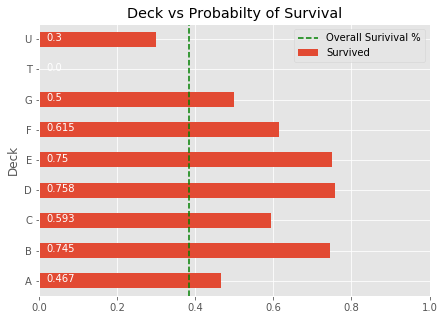

In [18]:
plot_helper(train_df[['Deck','Survived']].groupby(['Deck']).mean(),
            "Deck vs Probabilty of Survival", pct_survived)

## 3.6. `Parch`, `SibSp`, and *`FamilySize` (new feature)*<a id="3.6."></a>
Let us combine the parents, childern, sibilings, spouses info in a new `FamilySize` feature

In [19]:
for df in datasets:
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1   # adding +1 for the person him/herself
    
# Summary of the FamilySize Feature
pd.DataFrame({'Train':train_df['FamilySize'].value_counts(),
             'Test':test_df['FamilySize'].value_counts()}, dtype = np.float64)

,Test,Train
1,253.0,537.0
2,74.0,161.0
3,57.0,102.0
4,14.0,29.0
5,7.0,15.0
6,3.0,22.0
7,4.0,12.0
8,2.0,6.0
11,4.0,7.0


Given that the vast majority of the samples have `FamilySize` <= 4, let us band the FamilySize into the following buckets: 1, 2, 3, 4, 5+ :

In [20]:
for df in datasets:
    df.loc[df['FamilySize'] >= 5, 'FamilySize'] = '5+'

# Review Summary of the FamilySize Feature
pd.DataFrame({'Train':train_df['FamilySize'].value_counts(),
             'Test':test_df['FamilySize'].value_counts()}, dtype = np.float64)

,Test,Train
1,253.0,537.0
2,74.0,161.0
3,57.0,102.0
5+,20.0,62.0
4,14.0,29.0


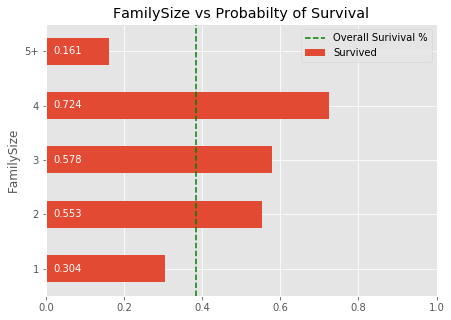

In [21]:
plot_helper(train_df[['FamilySize','Survived']].groupby(['FamilySize']).mean(),
            "FamilySize vs Probabilty of Survival", pct_survived)

## 3.7. `Fare` and *`Fare_bracket (new feature)`*<a id="3.7."></a>
- The test dataset has some null values for the `Fare` feature. We will fill the missing values with the median fare paid.
- Passengers who survived paid on average more than double the fare than those who perished (\$ 48 vs  \$ 22) 
- Both `train` and `test` datasets have very similar breakdown in prices (quartile data)

In [22]:
# Fill missing values with median Fare
for df in datasets:
    df.loc[df.Fare.isnull(),'Fare'] = df.Fare.median()
    
# Mean fare paid by surviving passengers
print ('Mean Fare paid by surviving and non-surviving passengers')
train_df[['Fare','Survived']].groupby('Survived').mean()

Mean Fare paid by surviving and non-surviving passengers


,Fare
Survived,
0,22.117887
1,48.395408


Let's summarize the Fares in the `train` and `test` datasets

In [23]:
pd.DataFrame({'Train':train_df.Fare.describe(),
              'Test':test_df.Fare.describe()})

,Test,Train
count,418.000000,891.000000
mean,35.576535,32.204208
std,55.850103,49.693429
min,0.000000,0.000000
25%,7.895800,7.910400
50%,14.454200,14.454200
75%,31.471875,31.000000
max,512.329200,512.329200


Let's transform the `Fare` variable into a categorical field based on the quartiles. Given the the `Test` and `Train` datasets have similar quartiles, we will define the brackets as follows:

In [24]:
for df in datasets:
    df['Fare_bracket'] = pd.cut(df['Fare'],[0,8,15,32,550],
                                labels =['[0-8)','[8-15)','[15-32)','[32+)'], right = False)
    
train_df['Fare_bracket'].value_counts()

[0-8)      241
[15-32)    223
[8-15)     216
[32+)      211
Name: Fare_bracket, dtype: int64

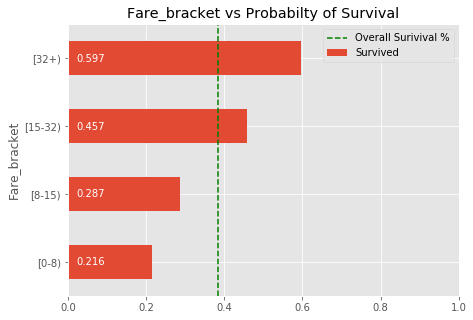

In [25]:
plot_helper(train_df[['Fare_bracket','Survived']].groupby(['Fare_bracket']).mean(),
            "Fare_bracket vs Probabilty of Survival", pct_survived)

## 3.8. `Title`<a id="3.8."></a>

Let us extract the titles from the names

In [26]:
#Extract the titles
for df in datasets:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
# Review the top values of Titles in both datasets. Note that 'Dona' appears only in test_df
pd.concat([train_df.Title.value_counts(), test_df.Title.value_counts()], 
              keys=['Train','Test'],axis = 1).sort_values('Train', ascending=False)

,Train,Test
Mr,517.0,240.0
Miss,182.0,78.0
Mrs,125.0,72.0
Master,40.0,21.0
Dr,7.0,1.0
Rev,6.0,2.0
Major,2.0,NaN
Col,2.0,2.0
Mlle,2.0,NaN
Mme,1.0,NaN


Most of the samples have titles of Mr, Miss, Mrs, or Master. Therefore we will group the other titles as 'Other'

In [27]:
for df in datasets:
    df['Title'] = df['Title'].replace('Mme','Mrs')
    df['Title'] = df['Title'].replace('Ms','Miss')
    df['Title'] = df['Title'].replace('Mlle','Miss')
    
    #group other titles as 'Other'
    df['Title'] = df['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr',
                                       'Jonkheer','Lady','Major','Rev','Sir'], 'Other')

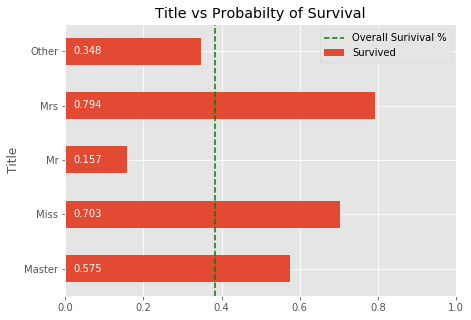

In [28]:
plot_helper(train_df[['Title','Survived']].groupby(['Title']).mean(),
            "Title vs Probabilty of Survival", pct_survived)

----
# 4. Machine Learning Model<a id="4."></a>

Now that we have good understanding of the data, let us find a classifier that best fits this data. 

In [29]:
clf_scores = {}

## 4.1. Create feature and response list<a id="4.1."></a>

1) Let us **One Hot Encode catagorical features** and create new `train_ML` and `test_ML` datasets:

In [30]:
cat_features = ['Age_bracket','Pclass','Embarked','Deck','FamilySize','Fare_bracket','Title']
train_ML = pd.get_dummies(train_df, columns = cat_features)
test_ML = pd.get_dummies(test_df, columns = cat_features)

2) Drop unecessary features:

Note: `test_df` does not have any samples with `Deck` = T. Given that there was only sample with `Deck` = T, we will drop `Deck_T` from the `train_df` while building our models (for the sake of simplicity).

In [31]:
features_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','Fare','Age']
train_ML.drop(features_to_drop, axis = 1, inplace = True)
test_ML.drop(features_to_drop, axis = 1, inplace = True)

train_ML.drop('Deck_T', axis = 1, inplace = True)

print(train_ML.columns)
print(test_ML.columns)

Index(['Survived', 'Sex', 'Age_bracket_[0-10)', 'Age_bracket_[10-20)',
       'Age_bracket_[20-30)', 'Age_bracket_[30-40)', 'Age_bracket_[40-50)',
       'Age_bracket_[50-60)', 'Age_bracket_[60+)', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U',
       'FamilySize_1', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4',
       'FamilySize_5+', 'Fare_bracket_[0-8)', 'Fare_bracket_[8-15)',
       'Fare_bracket_[15-32)', 'Fare_bracket_[32+)', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other'],
      dtype='object')
Index(['Sex', 'Age_bracket_[0-10)', 'Age_bracket_[10-20)',
       'Age_bracket_[20-30)', 'Age_bracket_[30-40)', 'Age_bracket_[40-50)',
       'Age_bracket_[50-60)', 'Age_bracket_[60+)', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',

3) Next, we will drop the following **Dummy Variables** in the datasets:
* `Age_bracket_[60+)`
* `Pclass_1`
* `Embarked_C`
* `Deck_U`
* `FamilySize_5+`
* `Fare_bracket_[32+)`
* `Title_Other`
   

In [32]:
dummy_vars = ['Age_bracket_[60+)','Pclass_1','Embarked_C','Deck_U','FamilySize_5+',
             'Fare_bracket_[32+)','Title_Other']

train_ML.drop(dummy_vars, axis = 1, inplace = True)
test_ML.drop(dummy_vars, axis = 1, inplace = True)

4) Create **Feature and Response arrays**:

In [33]:
y = train_ML.Survived
X = train_ML.drop('Survived', axis = 1)
X_tst= test_ML

5) Finally, let us calculate the **Null Accuracy** for the `test_df` dataframe: 

Null Accuracy is the accuracy that could be achieved by **always predicting the most frequent class** (which in this case is survived = 0). We can use this as a baseline to measure against our models.

In [34]:
null_accuracy =  1-y.mean()
print ('Null Accuracy (survive = 0): ', null_accuracy)

Null Accuracy (survive = 0):  0.6161616161616161


## 4.2. Logistic Regression<a id="4.2."></a>

In [35]:
logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy')

clf_scores['Logistic_Regression'] = scores.mean()
print ('Mean Score: ', scores.mean())

Mean Score:  0.830507604131


## 4.3. K-Nearest Neighbors<a id="4.3."></a>

Let us use Gread_Search_CV to find the optimal number of neighbors `n_neighbors`:

In [36]:
knn = KNeighborsClassifier()
k_range = list(range (1,70))
param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit (X,y)

# examine best model
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

clf_scores['KNN'] = grid.best_score_

0.821548821549
{'n_neighbors': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


*Optional* - We could have also tried to find the optimal K value visually. However, Gird Search CV automitcally finds the best `n_neighbor` value, which is ~20 in this case

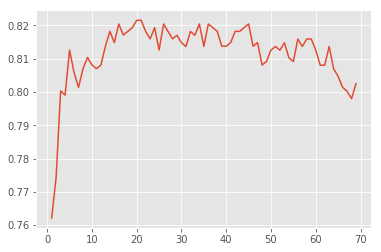

In [37]:
k_range = range (1,70)
k_scores = []
for n in k_range:
    knn = KNeighborsClassifier (n_neighbors = n)
    scores = cross_val_score(knn, X,y,cv=10, scoring ='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)

## 4.4. Decision Trees<a id="4.4."></a>

In [38]:
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, y, cv=10, scoring = 'accuracy')

print ('Mean Score: ', scores.mean())
clf_scores['Decision_Tree'] = scores.mean()

Mean Score:  0.799209227102


## 4.5. SVC<a id="4.5."></a>

Let us use Grid Search CV to determine the best `C` and `degree` parameters for SVC

In [39]:
svc = SVC()
c_range = list(np.arange (0.1,5.1,0.1))
degree_range = list(range(0,5))

param_grid = dict(C = c_range, degree = degree_range)
grid = GridSearchCV(svc, param_grid, cv=10, scoring ='accuracy')
grid.fit(X,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

clf_scores['SVC'] = grid.best_score_

0.833894500561
{'C': 2.6000000000000001, 'degree': 0}
SVC(C=2.6000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## 4.6. Random Forest Classifier<a id="4.6."></a>

In [40]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=10, scoring = 'accuracy')

print ('Mean Score: ', scores.mean())
clf_scores['Random_Forest'] = scores.mean()

Mean Score:  0.806974520486


# 5. Evaluation<a id="5."></a>

Let's review all the (mean) scores of each classifier

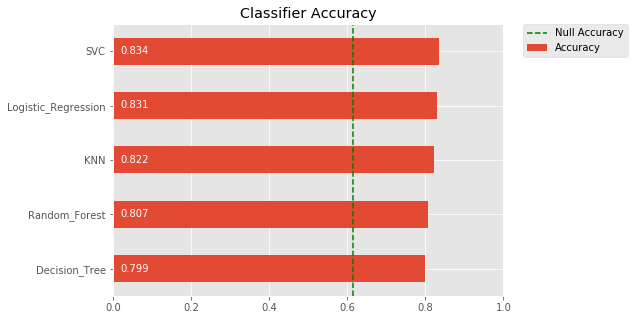

In [41]:
ax = pd.Series(data=clf_scores).sort_values().plot(kind = "barh", figsize =(7,5),
                                     xlim=(0.0,1.0), label ='Accuracy')
ax.set_title ('Classifier Accuracy')
ax.axvline(x=null_accuracy, color ='g',linestyle='--', label='Null Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for p in ax.patches:
    ax.annotate (str(round(p.get_width(),3)),
                 xy=(p.get_x()+0.02, p.get_y()+p.get_height()/2.5),
                 color = "white" )
plt.show()

Best model is **SVC with a mean accuracy score of 0.834**.

### Prediction

Let us use SVC classifier with C = 2.6, degree = 0) to predict our data:

In [42]:
svc = SVC (C=2.60, degree = 0)
svc.fit(X,y)
y_pred = svc.predict(X_tst)

In [43]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],
    'Survived':y_pred})

submission.to_csv('./submission_svc.csv', index=False)

----
I hope you enjoyed the analysis! This notebook was created by [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan). Feel free to contact me if you have any questions.